# Introduction

Google Trends provides us with an approximation of how frequently something is searched for. Let's investigate whether the level of search interest is connected to other types of information. Maybe there are correlations between Google's search activity and the value of Bitcoin or a prominent stock such as Tesla. Perhaps the frequency of searches for the phrase "Unemployment Benefits" can offer insights into the real unemployment rate.

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv(r"C:\Users\personal\Downloads\Google+Trends+Data+Viz+(start)\Google Trends Data Viz (start)\TESLA Search Trend vs Price.csv")

df_btc_search = pd.read_csv(r'C:\Users\personal\Downloads\Google+Trends+Data+Viz+(start)\Google Trends Data Viz (start)\Bitcoin Search Trend.csv')

df_btc_price = pd.read_csv(r'C:\Users\personal\Downloads\Google+Trends+Data+Viz+(start)\Google Trends Data Viz (start)\Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv(r'C:\Users\personal\Downloads\Google+Trends+Data+Viz+(start)\Google Trends Data Viz (start)\UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

<li>A) What are the shapes of the dataframes? </li>

In [3]:
print(f"Shape of Tesla: {df_tesla.shape}")
print("")
print(f"Shape of Btc Search: {df_btc_search.shape}")
print("")
print(f"Shape of Btc price: {df_btc_price.shape}")
print("")
print(f"Shape of Unemployment: {df_unemployment.shape}")

Shape of Tesla: (124, 3)

Shape of Btc Search: (73, 2)

Shape of Btc price: (2204, 3)

Shape of Unemployment: (181, 3)


<li>B) What are the column names? </li>

In [4]:
print(f"Tesla Columns: {df_tesla.columns}")
print("")
print(f"Btc Search Columns: {df_btc_search.columns}")
print("")
print(f"Btc price Columns: {df_btc_price.columns}")
print("")
print(f"Unemployment Columns: {df_unemployment.columns}")

Tesla Columns: Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

Btc Search Columns: Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

Btc price Columns: Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

Unemployment Columns: Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


<li>C) Show the largest/smallest number in the search data column</li>

## TESLA

In [5]:
largest_tesla_search = df_tesla["TSLA_WEB_SEARCH"].max()
print(f'Largest value for Tesla in Web Search: {largest_tesla_search}')

Largest value for Tesla in Web Search: 31


In [6]:
smallest_tesla_search = df_tesla["TSLA_WEB_SEARCH"].min()
print(f'Smallest value for Tesla in Web Search: {smallest_tesla_search}')

Smallest value for Tesla in Web Search: 2


### Unemployment Data

In [7]:
largest_unemployment_search = df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()
print(f'Largest value for Unemployment in Web Search: {largest_unemployment_search}')

Largest value for Unemployment in Web Search: 100


In [8]:
smallest_unemployment_search = df_unemployment["UE_BENEFITS_WEB_SEARCH"].min()
print(f'Smallest value for Unemployment in Web Search: {smallest_unemployment_search}')

Smallest value for Unemployment in Web Search: 14


### Bitcoin

In [9]:
largest_btc_search = df_btc_search["BTC_NEWS_SEARCH"].max()
print(f'Largest value for BTC in Web Search: {largest_btc_search}')

Largest value for BTC in Web Search: 100


In [10]:
smallest_btc_search = df_btc_search["BTC_NEWS_SEARCH"].min()
print(f'Smallest value for BTC in Web Search: {smallest_btc_search}')


Smallest value for BTC in Web Search: 3


<li>D) Checked some useful descriptive statistics</li>

In [11]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [12]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [13]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [14]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


# Data Cleaning

### Check for Missing Values

In [15]:
df_btc_price.isna().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [16]:
df_tesla.isna().sum()

MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

In [17]:
df_btc_price.isna().values.any()

True

In [18]:
print(f'Missing values for Tesla?:{df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()} ')
print(f'Missing values for BTC Search?:{df_btc_price.isna().values.any()}')

Missing values for Tesla?:False
Missing values for U/E?: False 
Missing values for BTC Search?:True


In [19]:
print(f'Number of missing values:{df_btc_price.isna().values.sum()}')


Number of missing values:2


In [20]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [21]:
btc_na = df_btc_price[df_btc_price.isna().any(axis=1)]
btc_na

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


##### Find the exact row where the Nans are

In [22]:
df_btc_price[df_btc_price.VOLUME.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [23]:
df_btc_price.dropna(inplace=True)
df_btc_price.isna().values.sum()

0

### Convert Strings to DateTime Objects

In [24]:
type(df_tesla['MONTH'][0])

str

In [25]:
type(df_btc_search.MONTH[0])

str

In [26]:
type(df_btc_price.DATE[0])

str

In [27]:
type(df_unemployment.MONTH[0])

str

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [28]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_tesla['MONTH'] = pd.to_datetime(df_tesla.MONTH)
df_tesla['MONTH'].head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [29]:
df_btc_search.head()


,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [30]:
print(df_btc_price.shape)
df_btc_price.head()

(2203, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [31]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [35]:
bt_price['DATE'] = pd.to_datetime(bt_price['DATE'])
bt_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [42]:
bt_price_m = bt_price.resample('M', on='DATE').last()
print(bt_price_m.shape)
bt_price_m.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

In [37]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [45]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_tesla_year = df_tesla.resample('Y', on='MONTH').last()
print(df_tesla_year.shape)
df_tesla_year.head()

(11, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
MONTH,,,
2010-12-31,2010-12-01,2,5.326000
2011-12-31,2011-12-01,2,5.712000
2012-12-31,2012-12-01,3,6.774000
2013-12-31,2013-12-01,5,30.086000
2014-12-31,2014-12-01,6,44.481998


### Tesla Stock Price v.s. Search Volume

How to add tick formatting for dates on the x-axis. 

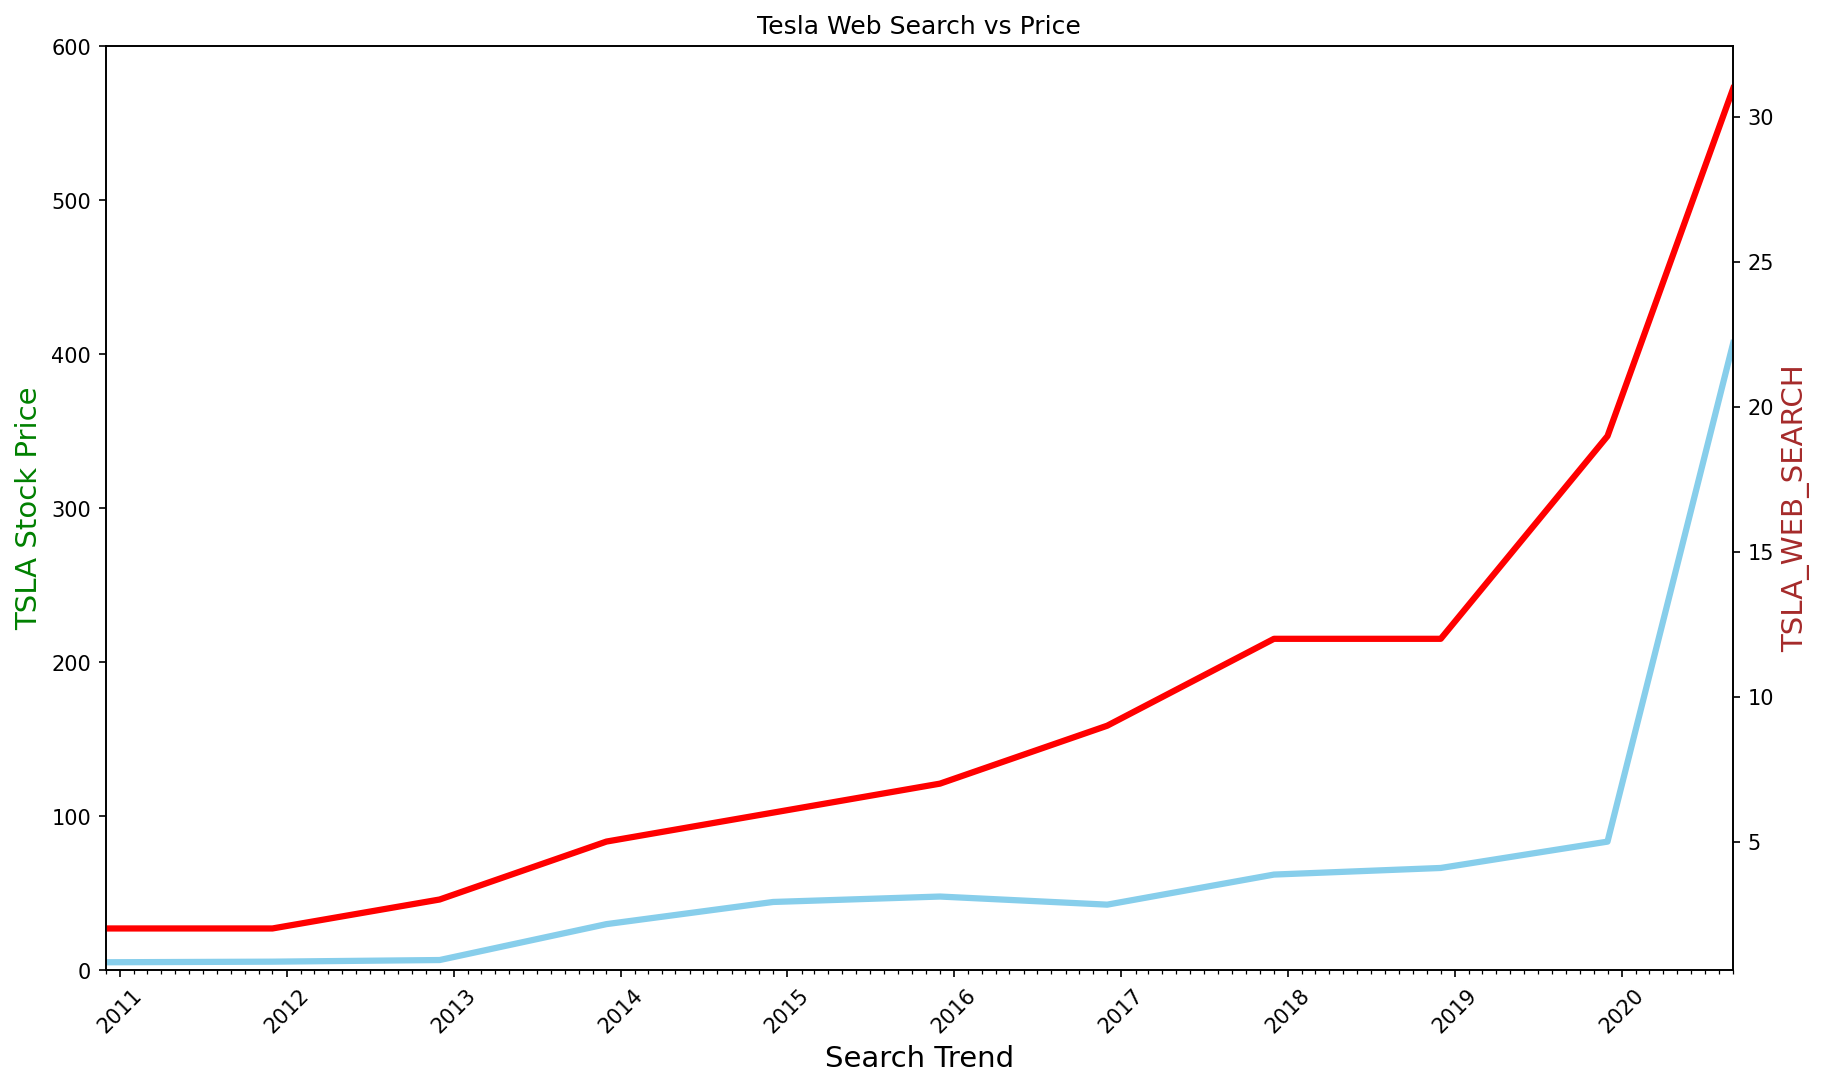

In [85]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14, 8), dpi=150, edgecolor='red')
ax1 = plt.gca()
ax2 = ax1.twinx()
plt.title('Tesla Web Search vs Price')

ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim([0, 600])
ax1.set_xlim(df_tesla_year.MONTH.min(), df_tesla_year.MONTH.max())

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('TSLA Stock Price', fontsize=14, color='green')
ax2.set_ylabel('TSLA_WEB_SEARCH', fontsize=14, color='brown')
ax1.set_xlabel('Search Trend', fontsize=14)

ax1.plot(df_tesla_year.MONTH, df_tesla_year['TSLA_USD_CLOSE'], linewidth = 3, color='skyblue')
ax2.plot(df_tesla_year.MONTH, df_tesla_year['TSLA_WEB_SEARCH'], linewidth = 3, color='red')
plt.show()

<h5> Observation(s): Increase in the stock price accounts for the increase in the stock search </h5>

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [117]:
df_btc_montly = df_btc_price.resample('M', on='DATE').last()
print(df_btc_montly.shape)
df_btc_montly.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [122]:
df_btc_search.BTC_NEWS_SEARCH.min()

3

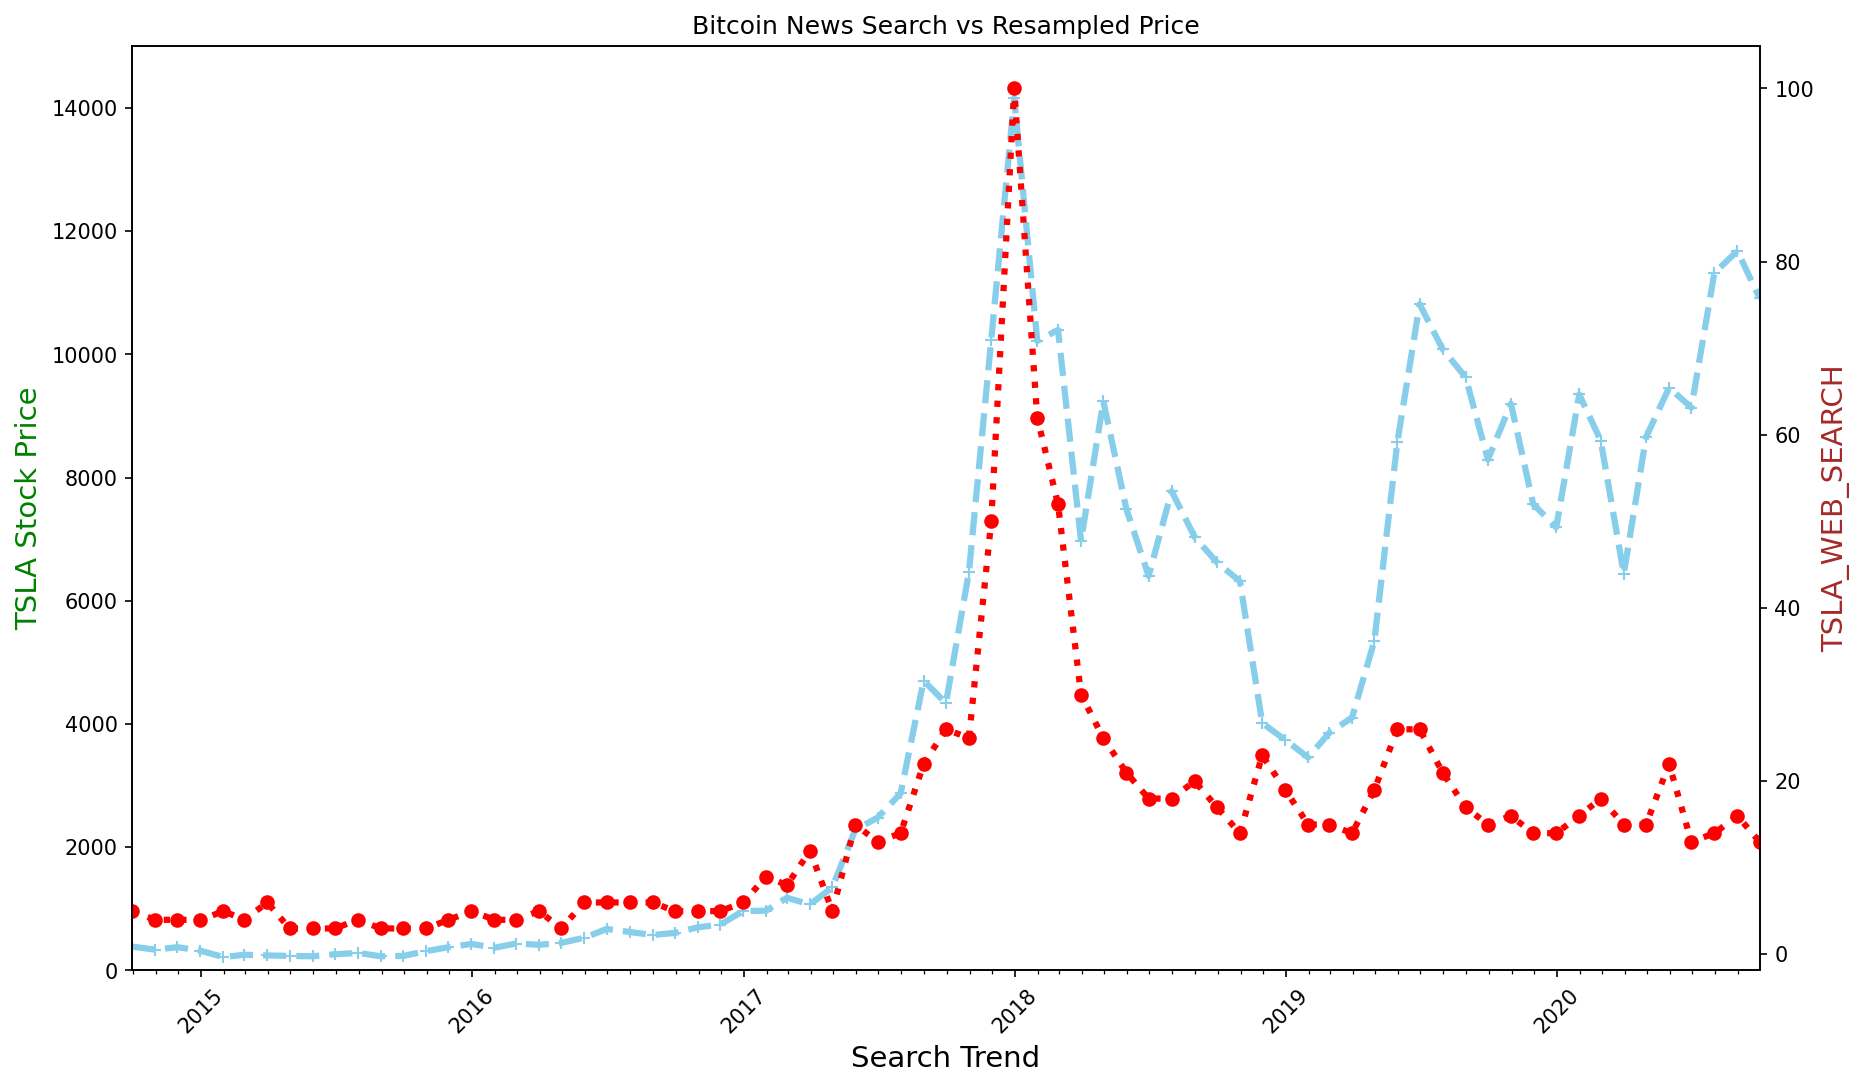

In [131]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14, 8), dpi=150)
ax1 = plt.gca()
ax2 = ax1.twinx()
plt.title('Bitcoin News Search vs Resampled Price')

ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim([0, 15000])
ax1.set_xlim(df_btc_montly.index.min(), df_btc_montly.index.max())

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('TSLA Stock Price', fontsize=14, color='green')
ax2.set_ylabel('TSLA_WEB_SEARCH', fontsize=14, color='brown')
ax1.set_xlabel('Search Trend', fontsize=14)

ax1.plot(df_btc_montly.index, df_btc_montly.CLOSE, linewidth = 3, color='skyblue', linestyle='dashed', marker='+')
ax2.plot(df_btc_montly.index, df_btc_search.BTC_NEWS_SEARCH, linewidth = 3, color='red', linestyle='dotted', marker='o')
plt.show()

<h3>Obersevations:</h3>
<h4><ol>The Drastic increase in price is as a result of the high Search in the early 2018.</ol></h4>
<h4><ol>We also notice an increase in btc price with little search in Q1 2019.</ol></h4> 
<h4><ol>This is because of the good knowledge of BTC which makes purchase comfortable.</ol></h4>


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

In [138]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


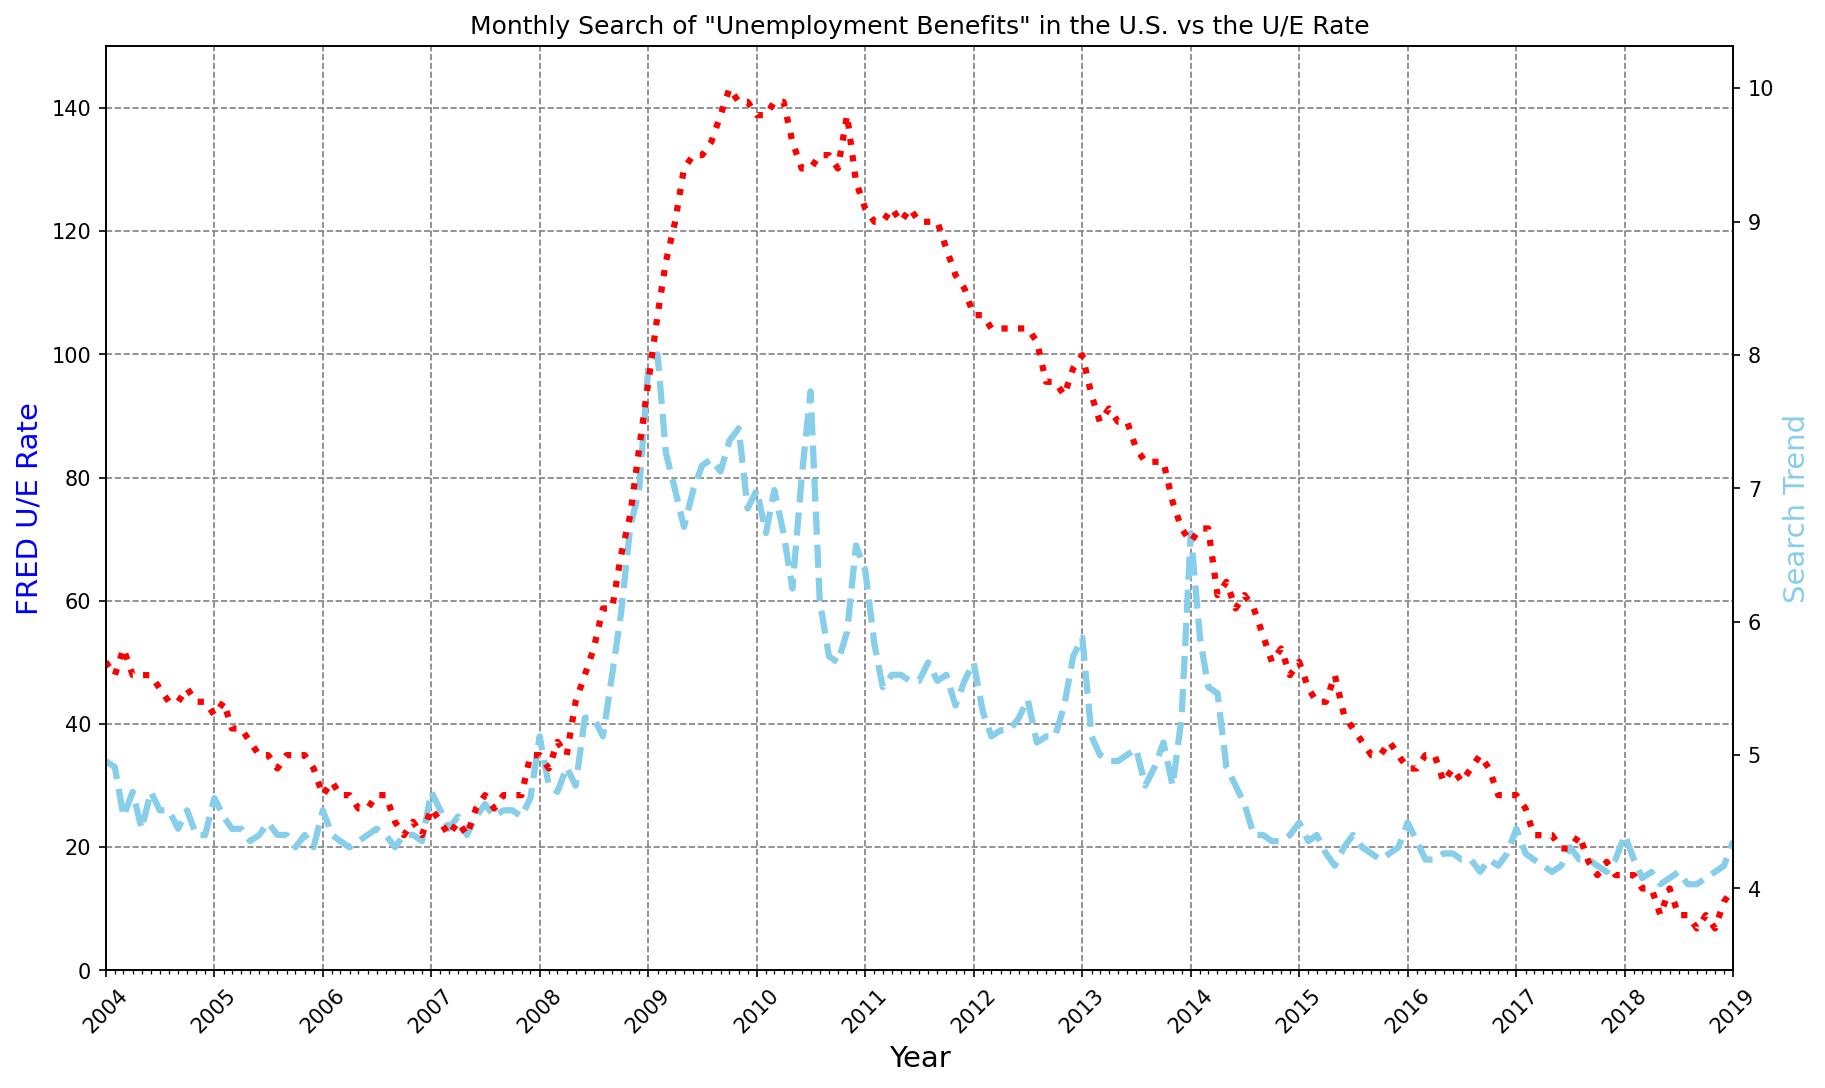

In [152]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14, 8), dpi=150)

ax1 = plt.gca()
ax2 = ax1.twinx()
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
ax1.grid(color='grey', linestyle='--')

ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim([0, 150])
ax1.set_xlim(df_unemployment.MONTH.min(), df_unemployment.MONTH.max())

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', fontsize=14, color='blue')
ax2.set_ylabel('Search Trend', fontsize=14, color='skyblue')
ax1.set_xlabel('Year', fontsize=14)

ax1.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, linewidth = 3, color='skyblue', linestyle='dashed')
ax2.plot(df_unemployment.MONTH, df_unemployment.UNRATE, linewidth = 3, color='red', linestyle='dotted')
plt.show()

<h2> Observations:</h2>

#### We drastically noticed the decrease of search for unemployment benefit in 2014 as unemployment rate decrease.

#### while late 2008 there was high rocket search for unemployment benefit due to the high rate of unemployment.

#### This may suggest the awareness of the available benefits for unemployed people in US.

#### We also notciced an increase in the unemployment rate and no corresponding search something else might have caused this.

#### We noticed as well the spike in unemploymnent rate towards the end of the year as lot of people tend to change jobs.

**6-month rolling average for the web searches**


In [158]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
roll_df.tail()

,UE_BENEFITS_WEB_SEARCH,UNRATE
176,14.833333,3.850000
177,14.666667,3.816667
178,15.000000,3.800000
179,15.333333,3.783333
180,16.166667,3.816667


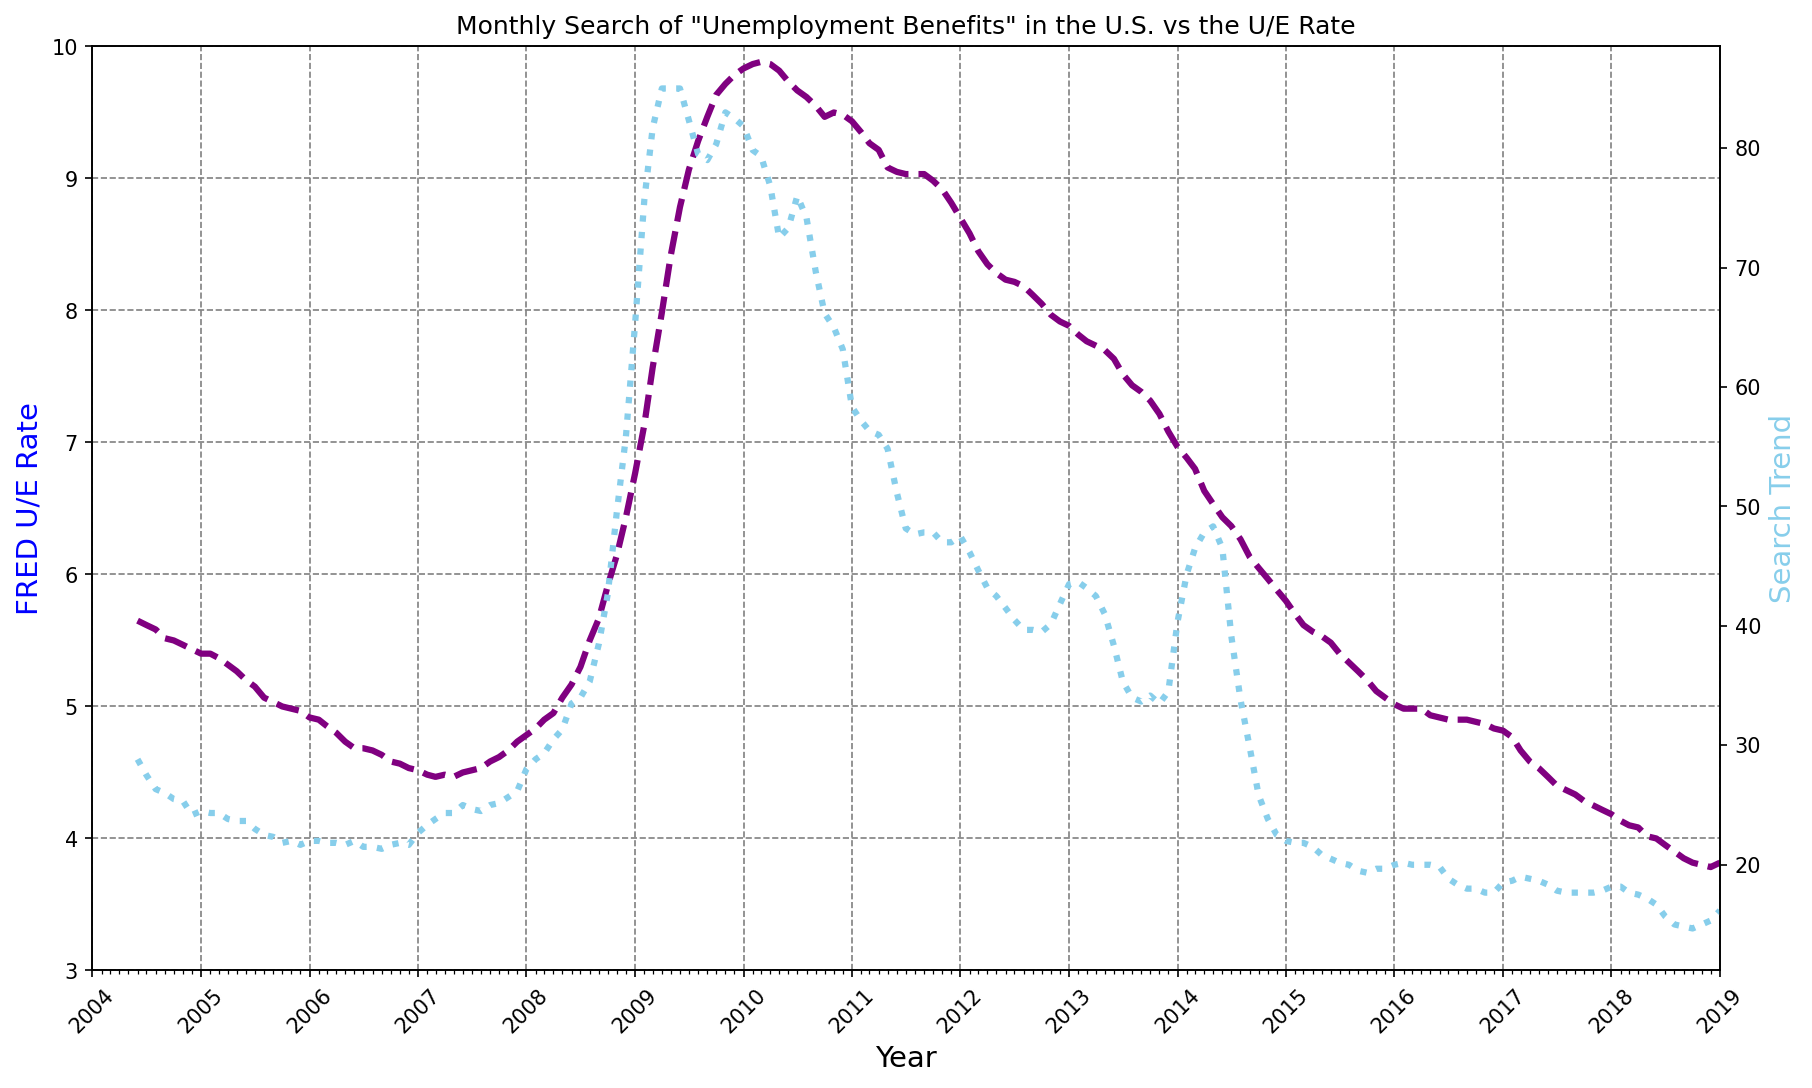

In [163]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14, 8), dpi=150)

ax1 = plt.gca()
ax2 = ax1.twinx()
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
ax1.grid(color='grey', linestyle='--')

ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim([3, 10])
ax1.set_xlim(df_unemployment.MONTH.min(), df_unemployment.MONTH.max())

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', fontsize=14, color='blue')
ax2.set_ylabel('Search Trend', fontsize=14, color='skyblue')
ax1.set_xlabel('Year', fontsize=14)

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, linewidth = 3, color='purple', linestyle='dashed')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, linewidth = 3, color='skyblue', linestyle='dotted')
plt.show()

<h3> Observations </h3>

#### We noticed a spike in the unemployment rate even before the web search.

#### Same observation for the fall in the unemployment before the web search which ought to be an indicator.

### Including 2020 in Unemployment Charts

In [171]:
df_bs_r = pd.read_csv(r"C:\Users\personal\Downloads\Google+Trends+Data+Viz+(start)\Google Trends Data Viz (start)\UE Benefits Search vs UE Rate 2004-20.csv")
df_bs_r.head()                       

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [176]:
df_bs_r.max()

MONTH                     2020-08-01 00:00:00
UE_BENEFITS_WEB_SEARCH                    100
UNRATE                                   14.7
dtype: object

In [174]:
df_bs_r['MONTH'] = pd.to_datetime(df_bs_r['MONTH'])
print(type(df_bs_r['MONTH'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


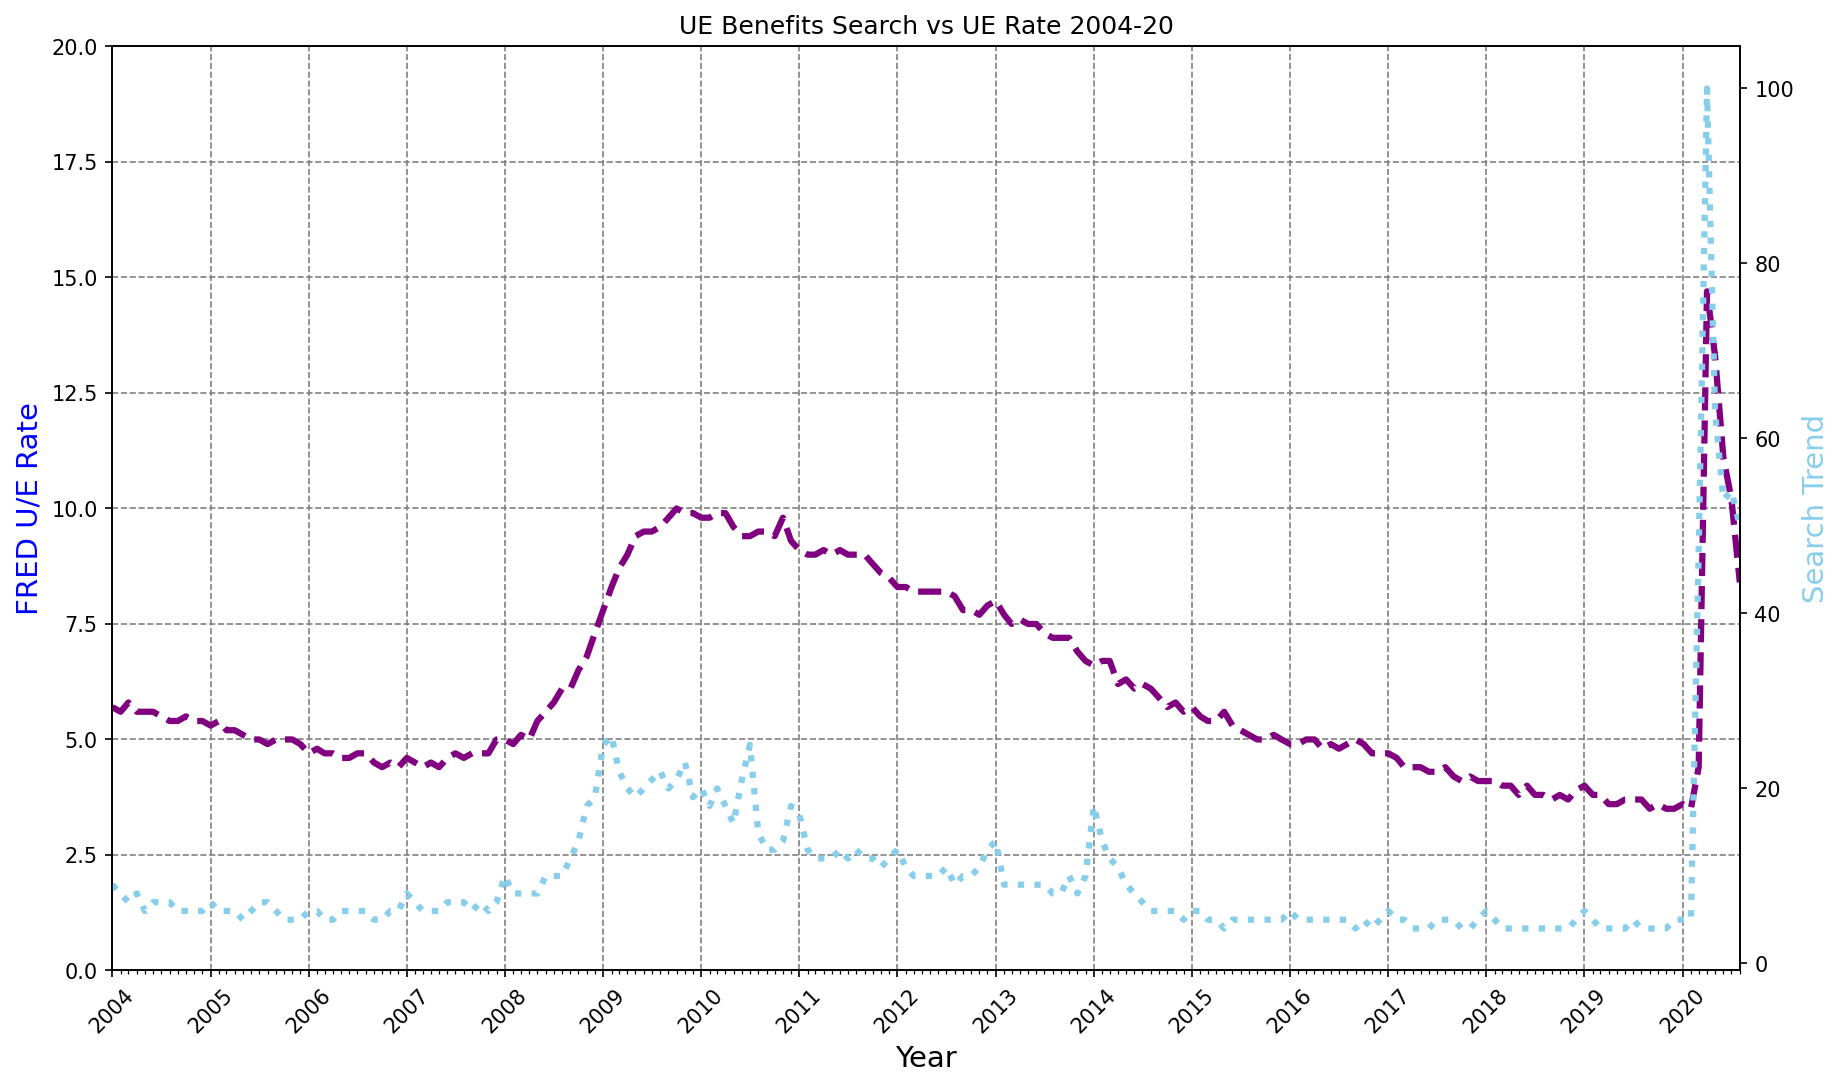

In [177]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14, 8), dpi=150)

ax1 = plt.gca()
ax2 = ax1.twinx()
plt.title('UE Benefits Search vs UE Rate 2004-20')
ax1.grid(color='grey', linestyle='--')

ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim([0, 20])
ax1.set_xlim(df_bs_r.MONTH.min(), df_bs_r.MONTH.max())

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', fontsize=14, color='blue')
ax2.set_ylabel('Search Trend', fontsize=14, color='skyblue')
ax1.set_xlabel('Year', fontsize=14)

ax1.plot(df_bs_r.MONTH, df_bs_r.UNRATE, linewidth = 3, color='purple', linestyle='dashed')
ax2.plot(df_bs_r.MONTH, df_bs_r.UE_BENEFITS_WEB_SEARCH, linewidth = 3, color='skyblue', linestyle='dotted')
plt.show()

### Financial crises in 2008 was really bad and came down after 10 years. 
### We suddenly noticed a disturbing spike in the unemployment early 2020, we gues it was during the covid-19 pandemic.